In [21]:
!pip install torchviz

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

noise = np.random.rand(1, 10000) * 70

def np_noise(up_to_index):
  return noise[:, :up_to_index]

def torch_noise(up_to_index):
  return torch.from_numpy(noise[:, :up_to_index].astype(np.float32))

In [16]:
x = np.linspace(-1 * 5, 5, 1000)
x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
y = np.cos(x) + np_noise(1000)
y_torch = torch.add(torch.cos(x_torch), torch_noise(1000))
print(x.shape)
print(x_torch.shape)
print(y.shape)
print(y_torch.shape)

def run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000, np_func = np.cos, torch_func = torch.cos,
        model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)), learning_rate = 0.005,
        number_of_iterations = 10):
  x = np.linspace(-1 * train_bound, train_bound, number_of_train_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = np_func(x) + np_noise(number_of_train_points)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_train_points))

  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  loss_func = nn.MSELoss()

  losses = []
  for i in range(0, number_of_iterations):
    optimizer.zero_grad()
    loss = loss_func(model(x_torch), y_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  print(losses)

  x = np.linspace(-1 * test_bound, test_bound, number_of_test_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = (np_func(x) + np_noise(number_of_test_points)).reshape(-1)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_test_points))

  plt.plot(x, y, 'g', label = 'Original Function')
  plt.plot(x_torch.detach().numpy().flatten(), model(x_torch).detach().numpy().flatten(), 'r', label = 'Predicted Function')
  plt.show()

(1000,)
torch.Size([1000, 1])
(1, 1000)
torch.Size([1000, 1000])


In [17]:
def np_polynomial(x):
  return 2 * x ** 3 + 3 * x ** 2 + 4 * x + 1

def torch_polynomial(x):
  return torch.add(torch.add(torch.add(torch.mul(torch.pow(x, 3), 2), torch.mul(torch.pow(x, 2), 3)), torch.mul(x, 4)), 1)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[15869.728515625, 15561.7236328125, 15259.0859375, 14960.2080078125, 14663.7021484375, 14368.0927734375, 14072.015625, 13774.255859375, 13473.845703125, 13170.0185546875, 12862.205078125, 12550.0322265625, 12233.3447265625, 11912.1513671875, 11586.6337890625, 11257.0615234375, 10923.798828125, 10587.21484375, 10247.7041015625, 9905.6728515625, 9561.5185546875, 9215.623046875, 8868.404296875, 8520.3388671875, 8171.90576171875, 7823.677734375, 7476.2841796875, 7130.44677734375, 6787.03369140625, 6447.06201171875, 6111.6845703125, 5782.169921875, 5459.86767578125, 5146.1728515625, 4842.48828125, 4550.2021484375, 4270.66259765625, 4005.107177734375, 3754.638916015625, 3520.199951171875, 3302.580810546875, 3102.401611328125, 2920.1005859375, 2755.922607421875, 2609.90673828125, 2481.879638671875, 2371.450927734375, 2278.007080078125, 2200.719970703125, 2138.57373046875, 2090.34326171875, 2054.613037109375, 2029.8316650390625, 2014.3499755859375, 2006.469482421875, 2004.490966796875, 2006.76

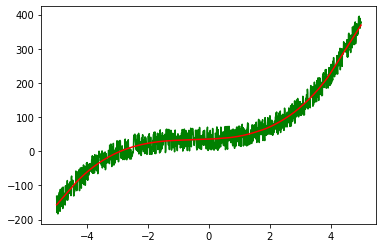

In [22]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[24711.51953125, 24244.19921875, 23780.716796875, 23319.130859375, 22857.7109375, 22394.8203125, 21928.794921875, 21458.16015625, 20981.654296875, 20498.357421875, 20007.595703125, 19508.94921875, 19002.4140625, 18488.171875, 17966.6875, 17438.66015625, 16904.8125, 16366.04296875, 15823.3349609375, 15277.78125, 14730.5439453125, 14182.72265625, 13635.5361328125, 13090.2041015625, 12548.017578125, 12010.2158203125, 11478.1083984375, 10952.7841796875, 10435.509765625, 9927.5087890625, 9430.21484375, 8944.56640625, 8471.78125, 8013.05078125, 7569.56201171875, 7142.49853515625, 6733.05126953125, 6342.41064453125, 5971.68115234375, 5622.02880859375, 5294.48291015625, 4990.01708984375, 4709.43701171875, 4453.36865234375, 4222.23486328125, 4016.2255859375, 3835.1875, 3678.6572265625, 3545.84130859375, 3435.632568359375, 3346.72900390625, 3277.26806640625, 3225.309326171875, 3188.75439453125, 3165.309326171875, 3152.6318359375, 3148.390625, 3150.266845703125, 3156.164306640625, 3164.2219238281

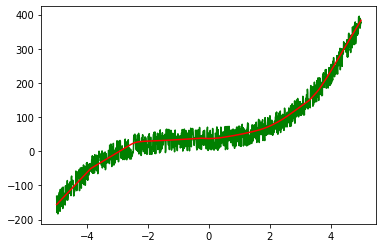

In [23]:
run(train_bound = 5, number_of_train_points = 10, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([5, 5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[36161.4609375, 35591.828125, 35026.2890625, 34461.94921875, 33896.828125, 33328.80859375, 32755.615234375, 32175.044921875, 31585.626953125, 30985.939453125, 30375.1328125, 29752.765625, 29118.80078125, 28473.45703125, 27817.2109375, 27150.66796875, 26474.86328125, 25790.990234375, 25100.142578125, 24403.58984375, 23703.072265625, 22999.578125, 22294.634765625, 21589.779296875, 20886.2890625, 20185.490234375, 19488.1484375, 18795.076171875, 18107.068359375, 17424.763671875, 16748.63671875, 16079.142578125, 15416.7802734375, 14762.244140625, 14115.9150390625, 13478.4541015625, 12850.6220703125, 12233.54296875, 11628.22265625, 11035.8798828125, 10457.9765625, 9896.4814453125, 9353.19921875, 8830.0849609375, 8328.9521484375, 7851.4970703125, 7399.5751953125, 6974.67919921875, 6578.10791015625, 6210.869140625, 5873.44921875, 5566.38232421875, 5289.712890625, 5043.09814453125, 4825.91748046875, 4637.205078125, 4475.68310546875, 4339.8017578125, 4227.7646484375, 4137.56103515625, 4067.02026

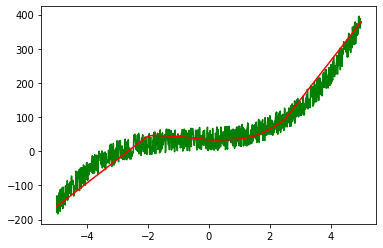

In [24]:
run(train_bound = 5, number_of_train_points = 5, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[16649.931640625, 16641.97265625, 16634.31640625, 16626.962890625, 16619.919921875, 16613.193359375, 16606.78515625, 16600.69140625, 16594.890625, 16589.26953125, 16583.8125, 16578.50390625, 16573.30859375, 16568.216796875, 16563.220703125, 16558.31640625, 16553.484375, 16548.71484375, 16543.990234375, 16539.279296875, 16534.552734375, 16529.765625, 16524.845703125, 16519.84375, 16514.888671875, 16509.947265625, 16504.96875, 16499.900390625, 16494.69921875, 16489.310546875, 16483.69921875, 16477.8203125, 16471.6484375, 16465.150390625, 16458.3046875, 16451.083984375, 16443.4765625, 16435.455078125, 16427.00390625, 16418.1015625, 16408.73828125, 16398.884765625, 16388.53515625, 16377.6689453125, 16366.2724609375, 16354.326171875, 16341.8173828125, 16328.7275390625, 16315.0478515625, 16300.7587890625, 16285.84765625, 16270.2978515625, 16254.095703125, 16237.232421875, 16219.6923828125, 16201.4609375, 16182.53125, 16162.884765625, 16142.51953125, 16121.416015625, 16099.5732421875, 16076.9

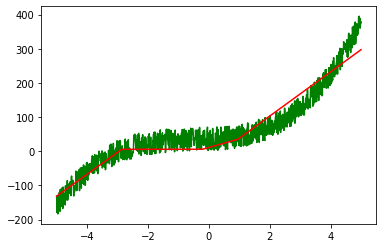

In [25]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[16593.57421875, 16582.544921875, 16571.30078125, 16559.76953125, 16547.80078125, 16535.30078125, 16522.234375, 16508.546875, 16494.369140625, 16480.755859375, 16466.67578125, 16451.904296875, 16436.4765625, 16420.322265625, 16403.181640625, 16384.978515625, 16365.6494140625, 16345.1298828125, 16323.36328125, 16300.3779296875, 16276.6044921875, 16251.7392578125, 16225.5419921875, 16197.919921875, 16168.8095703125, 16138.1572265625, 16105.9169921875, 16072.0380859375, 16036.4619140625, 15999.8525390625, 15961.9267578125, 15922.2412109375, 15880.7099609375, 15837.3486328125, 15792.1181640625, 15744.7763671875, 15695.3232421875, 15643.869140625, 15590.4716796875, 15535.2880859375, 15478.015625, 15418.228515625, 15355.9931640625, 15291.62109375, 15225.142578125, 15156.3955078125, 15085.236328125, 15011.5966796875, 14935.58203125, 14857.4560546875, 14777.50390625, 14695.1220703125, 14610.0947265625, 14522.3662109375, 14431.9326171875, 14339.09765625, 14244.1982421875, 14146.9521484375, 1404

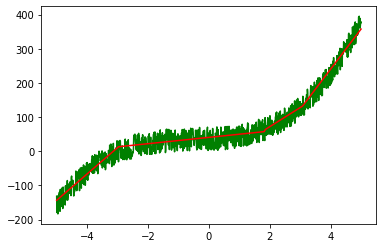

In [26]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[15755.296875, 15428.7001953125, 15107.5341796875, 14790.2490234375, 14475.0947265625, 14160.4375, 13844.9462890625, 13527.5791015625, 13207.484375, 12883.9443359375]


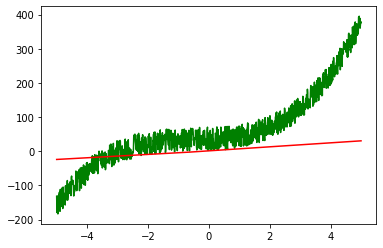

In [27]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[632842.0, 628089.0, 623367.125, 618656.0, 613934.5625, 609178.1875, 604361.5, 599462.375, 594461.5625, 589343.125, 584093.4375, 578701.4375, 573157.9375, 567455.75, 561590.125, 555557.125, 549354.5625, 542981.1875, 536436.6875, 529721.375, 522836.4375, 515783.5625, 508565.09375, 501184.03125, 493643.9375, 485949.6875, 478107.1875, 470121.4375, 461998.5, 453744.8125, 445367.78125, 436875.28125, 428275.9375, 419578.875, 410793.96875, 401931.5, 393002.59375, 384018.625, 374991.625, 365934.1875, 356859.125, 347779.84375, 338710.1875, 329664.03125, 320655.78125, 311699.96875, 302811.21875, 294004.25, 285293.8125, 276694.65625, 268221.25, 259887.921875, 251708.671875, 243697.125, 235866.3125, 228228.796875, 220796.453125, 213580.28125, 206590.5625, 199836.53125, 193326.53125, 187067.65625, 181066.0, 175326.375, 169852.3125, 164646.125, 159708.84375, 155040.140625, 150638.5, 146501.125, 142624.078125, 139002.296875, 135629.65625, 132499.109375, 129602.7890625, 126932.0859375, 124477.7109375,

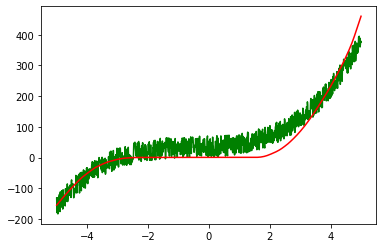

In [28]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[15683.484375, 15347.9501953125, 15016.1943359375, 14686.9736328125, 14359.1162109375, 14031.4423828125, 13702.8837890625, 13372.5439453125, 13039.6962890625, 12703.7763671875, 12364.404296875, 12021.3642578125, 11674.609375, 11324.26171875, 10970.587890625, 10613.9453125, 10254.833984375, 9893.8154296875, 9531.466796875, 9168.4052734375, 8805.279296875, 8442.751953125, 8081.47119140625, 7722.23388671875, 7365.8125, 7012.96337890625, 6664.48486328125, 6321.2314453125, 5984.1220703125, 5654.15283203125, 5332.39990234375, 5020.01513671875, 4718.21240234375, 4428.24755859375, 4151.4169921875, 3888.9912109375, 3642.169921875, 3411.989990234375, 3199.361328125, 3005.02001953125, 2829.49658203125, 2673.08447265625, 2535.870361328125, 2417.637939453125, 2317.8916015625, 2235.802978515625, 2170.2783203125, 2119.9833984375, 2083.370361328125, 2058.715087890625, 2044.1702880859375, 2037.821044921875, 2037.74755859375, 2042.0938720703125, 2049.12548828125, 2057.287841796875, 2065.24853515625, 207

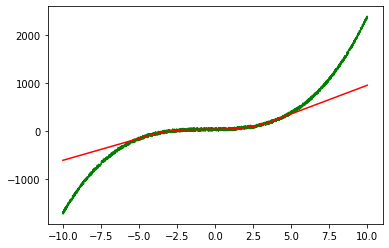

In [29]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)